# Load Data

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('C:/Users/onurm/Desktop/Titanic/train.csv')
test = pd.read_csv('C:/Users/onurm/Desktop/Titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# In order to handle missing values and adding new features in both train and test data, we combine them in a new dataframe. 

full = train.append(test, ignore_index = True)

titanic = full[:891]

print("Datasets", "full:", full.shape, "titanic:", titanic.shape )

Datasets full: (1309, 12) titanic: (891, 12)


In [120]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


# Visualize the Data

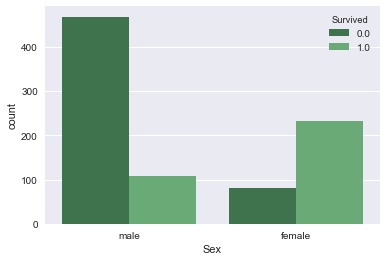

In [121]:
 sns.countplot(x="Sex",
               hue = "Survived",
               data = titanic,
               palette="Greens_d")

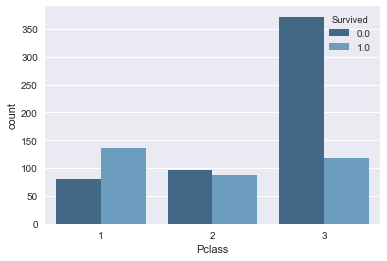

In [34]:
  sns.countplot(x="Pclass",
               hue = "Survived",
               data = titanic,
               palette="Blues_d")

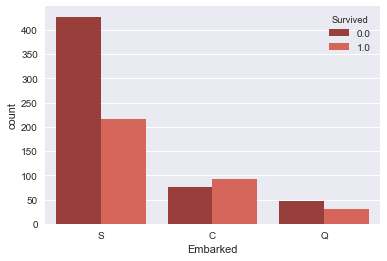

In [35]:
  sns.countplot(x="Embarked",
               hue = "Survived",
               data = titanic,
               palette="Reds_d")

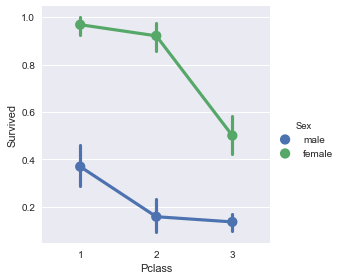

In [36]:
sns.factorplot(x="Pclass", 
 y="Survived",
 hue="Sex",
 data=titanic)

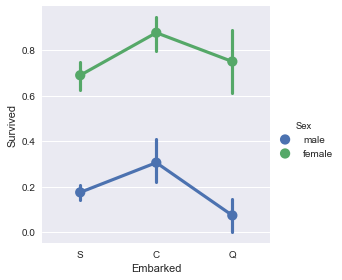

In [37]:
sns.factorplot(x="Embarked", 
 y="Survived",
 hue="Sex",
 data=titanic) 

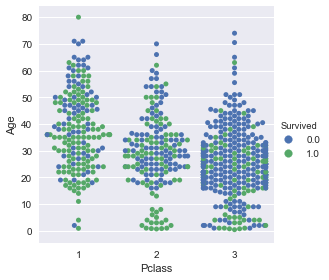

In [38]:
sns.factorplot(x="Pclass", y="Age", hue="Survived",
                data=titanic, kind="swarm")

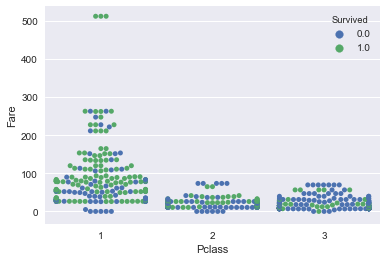

In [39]:
sns.swarmplot(x="Pclass", y="Fare", hue="Survived",
                data=titanic)

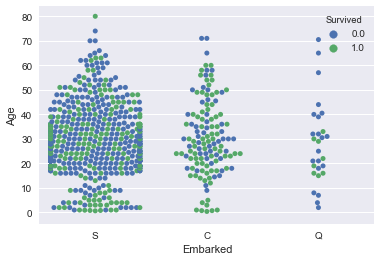

In [40]:
sns.swarmplot(x="Embarked", y="Age", hue="Survived",
                data=titanic)

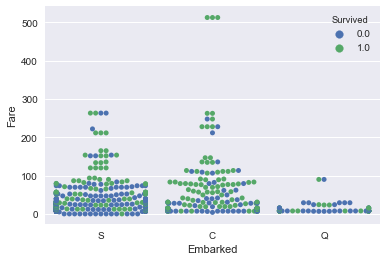

In [41]:
sns.swarmplot(x="Embarked", y="Fare", hue="Survived",
                data=titanic)

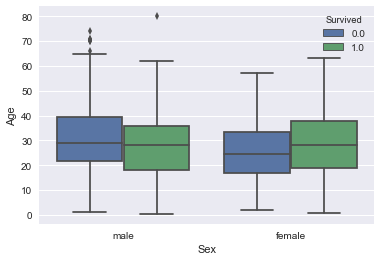

In [44]:
 sns.boxplot(x="Sex",
 y="Age",
 hue="Survived",
 data=titanic)

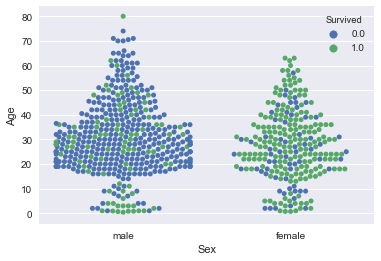

In [45]:
sns.swarmplot(x="Sex", y="Age", hue="Survived",
                data=titanic)

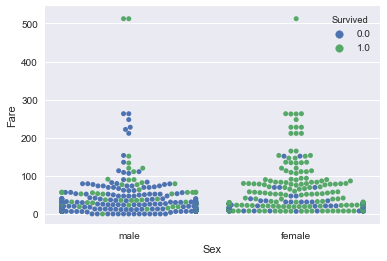

In [46]:
sns.swarmplot(x="Sex", y="Fare", hue="Survived",
                data=titanic)

# Missing Values and Feature Engineering

In [122]:
# We look the our data set in order to see the number of missing values for each feature.

full.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [123]:
# In order to fill the missing value of fare feature we look for which observation is missing.

full[full['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [124]:
# The median value of the observations that Embarked == 'S' and Pclass == '3' will give us suitable value to fill.

full['Fare'] = full['Fare'].fillna(full['Fare'][(full['Embarked'] == 'S') & (full['Pclass'] == 3)].median())

full[full['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


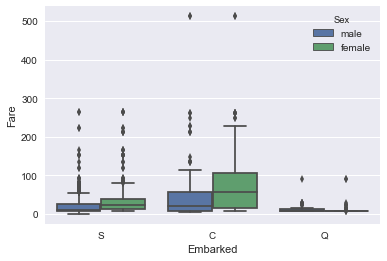

In [125]:
sns.boxplot(x = 'Embarked', y = 'Fare', hue = 'Sex', data = full)

In [126]:
# For both of the observations that have missing Embark feature, Fare-Cabin-Ticket-Pclass features has the same value. According
 
# to the boxplots, we can say that most of the observations that embark at 'C' has Fare value around 80. Also both passenger in 

# Pclass 1 , and same situation also true for this feature. So we can fill missing 'Embarked' values with 'C'. 

full['Embarked'] = full['Embarked'].fillna('C')

full.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [127]:
# Now, we have two feature with missing values. However, we have a lot of missing values for Cabin variable(1014 of 1309 is 

# missing) so we follow different strategy for this feature. We fill all of the missing values with 'N' , and then we take the

# letter part of the all 'Cabin' values and make a new feature called as 'CabinL'.

full['Cabin'] = full['Cabin'].fillna('N')

full['CabinL'] = full['Cabin'].apply(lambda x: x[0])

full['CabinL'].value_counts(dropna=False)

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: CabinL, dtype: int64

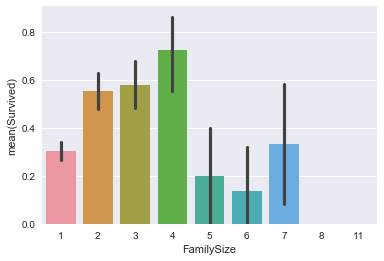

In [129]:
# We can also make a new feature called as 'FamilySize' with the help of 'Parch' ( number of parent and children) and 'SibSp'

# (number of siblings and spouses) features. We also add one to this values, this is the itself of the observations s/he is also

# part of the family.

full["FamilySize"] = full["Parch"] + full["SibSp"] + 1

sns.barplot(x="FamilySize", y="Survived", data=full)

In [130]:
# According to the plot above , have a family size bigger than four decrease the probabilty of survival. We can also make a new 

# feature with this information.

full['FSizeC'] = 'small'

full.loc[full['FamilySize'] == 1, 'FSizeC'] = 'single'

full.loc[full['FamilySize'] > 4, 'FSizeC'] = 'large'

full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CabinL,CabinF,FamilySize,FSizeC
0,22.0,N,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,N,N,2,small
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,C85,2,small
2,26.0,N,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,N,N,1,single
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,C123,2,small
4,35.0,N,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,N,N,1,single


In [131]:
# When we look 'Name' feature we can see that for each passenger there are also titles. These maybe useful piece for our 

# investigation so let's extract them and make a new feature called as 'Title'. 

import re

def extract_title(name):
    return re.findall(', ([^ .]*)', name)[0]

full['Title'] = full['Name'].apply(lambda name: extract_title(name))

Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the":        "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

full['Title'] = full['Title'].map(Title_Dictionary)

full['Title'].value_counts(dropna=False)

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

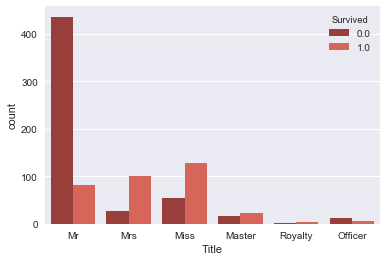

In [132]:
sns.countplot(x="Title",
               hue = "Survived",
               data = full,
               palette="Reds_d")

In [133]:
full['Ticket'].value_counts( dropna=False)


CA. 2343         11
CA 2144           8
1601              8
347082            7
347077            7
3101295           7
PC 17608          7
S.O.C. 14879      7
19950             6
382652            6
113781            6
347088            6
113503            5
4133              5
PC 17757          5
349909            5
220845            5
16966             5
W./C. 6608        5
113760            4
24160             4
C.A. 33112        4
36928             4
2666              4
SC/Paris 2123     4
12749             4
W./C. 6607        4
LINE              4
PC 17483          4
230136            4
                 ..
2648              1
315087            1
2223              1
21332             1
111369            1
113510            1
2683              1
347069            1
367229            1
113051            1
C 17369           1
2672              1
349215            1
237734            1
334912            1
SC/PARIS 2146     1
111426            1
A/4 45380         1
250653            1


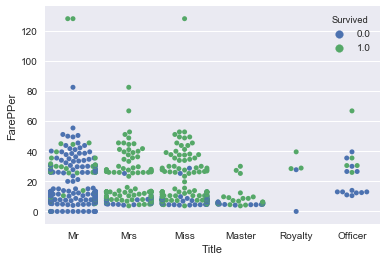

In [134]:
# We can see that there are a lot of people that have the same ticket and their fare values also same. Fare is not the cost of 

# the ticket for each person but the total cost for the ticket. Let's calculate cost for each person and put these values to the

# new feature.

x = full['Ticket'].value_counts( dropna=False)

full['FarePPer']  = full['Fare'] / full['Ticket'].map(dict(x))

sns.swarmplot(x="Title", y="FarePPer", hue="Survived", data=full)

In [135]:
# We also have a lot of missing values in the Age feature , so before build our models and make predictions we have to deal with

# this problem. There are a lot of way to do that, for example using random forest for predict age values, but I choose use median

# values.

full["Age"] = full.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))

full.isnull().sum()


Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
CabinL           0
CabinF           0
FamilySize       0
FSizeC           0
Title            0
FarePPer         0
dtype: int64

In [141]:
# In order to use in our models, we will convert our categorical variables to the dummy variables

familySize = pd.get_dummies( full['FSizeC'] , prefix = 'FSize' )

cabin = pd.get_dummies(full['CabinL'], prefix = 'Cabin')

pclass = pd.get_dummies(full['Pclass'], prefix = 'PClass')

title = pd.get_dummies(full['Title'], prefix = 'Title')

embarked = pd.get_dummies(full['Embarked'], prefix = 'Embarked')

sex = pd.Series(np.where(full['Sex'] == 'male', 1, 0), name = 'Sex')

fullc = full[['PassengerId','FarePPer', 'Age', 'Parch','SibSp','FamilySize']]

full_sel = pd.concat( [ fullc,familySize, pclass, title , embarked , cabin, sex] , axis=1 )

full_sel.shape

(1309, 31)

# Model Building and Prediction

In [142]:
# Now, we will split the test and train part in order to use them during the model building and prediction phases.

train = full_sel.iloc[0:891,1:]

test = full_sel.iloc[891:, :]

# We will use passenger id to write submission csv later.

passenger_id = test['PassengerId']

test = full_sel.iloc[891:,1:]

train_tar = full['Survived'].iloc[:891]
train_tar = train_tar.map(lambda x : int(x))

train.shape, test.shape

((891, 30), (418, 30))

In [143]:

train_X = train.copy()

train_y = train_tar.copy()

   We have a binary classification problem and we can use a lot of supervised machine learning algorithms to build our model.
I will use six of them  :

    1. Logistic Regression
    2. Random Forest
    3. Gradient Boosting
    4. Support Vector Machine
    5. KNN
    6. Neural Networks
    
   I will use grid search with cross validation in order to select the best parameters for the models. Because grid-search with cross-validation is such a commonly used method to adjust parameters scikit-learn provides the GridSearchCV class that implements it in the form of an estimator. To use the GridSearchCV class, we first need to specify the parameters we want to search over using a dictionary.After that, GridSearchCV will use cross-validation in place of the split into a training and validation set and give us the best parameters and best score. After that, we will use this model to predict Survived column.

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001,0.003, 0.01, 0.03, 0.1, 0.03, 1, 3, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(train_X, train_y)

print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

test_prediction = grid_search.predict(test)

test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )

test_result.to_csv( 'C:/Users/onurm/Desktop/Titanic/titanic_logreg.csv' , index = False )

Best cross-validation score: 0.83
Best parameters: {'C': 1}


In [88]:
from sklearn.ensemble import RandomForestClassifier


param_grid = {'max_depth' : [3, 4, 5, 6],
                 'n_estimators': [50, 100],
                 'max_features': ['sqrt'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [2, 3, 10],
                 'bootstrap': [True],
                 }


grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

grid_search.fit(train_X, train_y)


print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))


test_prediction = grid_search.predict(test)

test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )

test_result.to_csv( 'C:/Users/onurm/Desktop/Titanic/titanic_mrandfor.csv' , index = False )


Best cross-validation score: 0.84
Best parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'max_depth': 5, 'n_estimators': 50, 'max_features': 'sqrt', 'bootstrap': True}


In [89]:
from sklearn.ensemble import GradientBoostingClassifier


param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
             'max_depth': [2,3,4,5,6]}


grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)

grid_search.fit(train_X, train_y)


print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

test_prediction = grid_search.predict(test)

test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )

test_result.to_csv( 'C:/Users/onurm/Desktop/Titanic/titanic_gboost.csv' , index = False )

Best cross-validation score: 0.83
Best parameters: {'max_depth': 6, 'learning_rate': 0.01}


In [144]:
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline


pipe = Pipeline([("scaler", RobustScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10],
 'svm__gamma': [0.001, 0.01, 0.1, 1, 10]}


grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid_search.fit(train_X, train_y)


print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

test_prediction = grid_search.predict(test)

test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )

test_result.to_csv( 'C:/Users/onurm/Desktop/Titanic/titanic_svm.csv' , index = False )

Best cross-validation score: 0.83
Best parameters: {'svm__gamma': 0.01, 'svm__C': 1}


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


pipe = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])

param_grid = {'knn__n_neighbors': list(range(1, 60, 2))}


grid_search = GridSearchCV(pipe, param_grid = param_grid, cv=5)

grid_search.fit(train_X, train_y)


print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

test_prediction = grid_search.predict(test)

test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )

test_result.to_csv( 'C:/Users/onurm/Desktop/Titanic/titanic_knn.csv' , index = False )

Best cross-validation score: 0.82
Best parameters: {'knn__n_neighbors': 17}


In [87]:
from sklearn.neural_network import MLPClassifier


pipe = Pipeline([("scaler", MinMaxScaler()), ("nnc", MLPClassifier())])

param_grid = {'nnc__alpha': [0.001, 0.01, 0.1, 1, 10],
 'nnc__hidden_layer_sizes': [[5,5],[10,10]],
             'nnc__activation' : ['identity', 'tanh'],
            'nnc__max_iter': [2000]}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid_search.fit(train_X, train_y)


print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))


test_prediction = grid_search.predict(test)

test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )

test_result.to_csv( 'C:/Users/onurm/Desktop/Titanic/titanic_nnc.csv' , index = False )

Parameter grid:
{'nnc__alpha': [0.001, 0.01, 0.1, 1, 10], 'nnc__hidden_layer_sizes': [[5, 5], [10, 10]], 'nnc__max_iter': [2000], 'nnc__activation': ['identity', 'tanh']}
Best cross-validation score: 0.83
Best parameters: {'nnc__alpha': 0.01, 'nnc__activation': 'identity', 'nnc__hidden_layer_sizes': [10, 10], 'nnc__max_iter': 2000}
